# Sidharth Jahagirdar - ssj180009@utdallas.edu / 6822834728

# Fraud Detection - Case Study 1

# Importing Libraries and Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.pyplot import figure
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import average_precision_score, f1_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\sidha\Desktop\Stout Case Study\Case Study 1\PS_20174392719_1491204439457_log.csv")

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Describe the dataset and any issues with it.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


<b>Dataset description</b>
<br>
The dataset contains 11 attributes. Each record in the dataset points towards a transaction. We have transactions for 30 day time period. A detailed description highlighting the impact of each column and it's nuances is given below.<br><br>
<b>step: </b>Step refers to a unit of time, based on the description provided by the author of the dataset, 1 step of time equates to 1 hour in the real world. Based on this fact the value of steps should be numerical preferrably integer type, which can be confirmed from the table provided in the previous output.<br>
<b>type: </b>Type refers to the type(kind) of transaction, the possible type of transactions are "cash in", "cash out", "debit", "payment" & "transfer". Based on this information the data type of this attribute should be String, which can be confirmed from the above table, denoted as object(String Object) in this case.<br>
<b>amount: </b>Amount refers to the money value associated with the transaction, important fact to notice is that the currency associated with the transaction is the local currency. Based on this information the data type of this attribute should be float or decimal number which can be confirmed from the table above<br>
<b>nameOrig: </b>nameOrig refers to the customer who started the transaction, based on the values observed, we can say that it points to an alpha numeric reference number associated with the customer.Based on this information, the data type of this attribute should be a String, which can be confirmed from the above table, denoted as object(String Object) in this case.<br>
<b>oldbalanceOrg: </b>oldbalanceOrg refers to the initial balance(before transaction) of the customer who started the transaction, based on this we can say that the data type for oldbalanceOrg should be float or decimal number which can be confirmed from the above table.<br>
<b>newbalanceOrig: </b>newbalanceOrig refers to the new balance(after transaction) of the customer who started the transaction, based on this we can say that the data type for newbalanceOrig should be float or decimal number which can be confirmed from the above table.<br>
<b>nameDest: </b>nameDest refers to the recipient of the transaction. Based on the values observed, we can say that it points to an alpha numeric reference number associated with the recipient. Based on this information the data type of this attribute should be a String, which can be confirmed from the above table, denoted as object(String Object) in this case.<br>
<b>oldbalanceDest: </b>oldbalanceDest refers to the initial balance(before transaction) of the recepient. Based on this we can say that the data type for oldbalanceDest should be float or decimal number which can be confirmed from the above table.<br>
<b>newbalanceDest: </b>newbalanceDest refers to the new balance(after transaction) of the recepient. Based on this we can say that the data type for newbalanceDest should be float or decimal number, which can be confirmed from the above table.<br>
    <b>isFraud: </b>isFraud refers to a flag, which is 0 if the transaction is not marked as fraudulent, and marked as 1 if the transaction is fraudulent. Based on this, we can say that the datatype of this column should be integer taking values 0 or 1<br>
<b>isFlaggedFraud: </b>isFlaggedFraud refers to the transfer type transactions marked as illegal, it's marked as 1 if the transaction is marked illegal and 0 otherwise





<b>Issues with the dataset</b><br>
Require more clarity with the isFlaggedFraud column<br>
There are certain transactions which have an amount greater than the oldbalanceOrg(opening balance of the sender), I have considered these transactions as invalid, need more clarity on the same as these depend on the bank and country policies.<br>
There are records where opening balance/ending balance of sender/recipient, amount are not in harmony, need more clarity on the same<br>

# Visualizations

<b>1. Transaction Distribution

The transaction type distribution visual, gives us the idea about the type of transactions that takes place, and also the scale at which it takes place.<br><br>
<b>Not included in the visual below</b><br>
On further exploration, we findout that the cashout and transfer type of transaction are the ones which contain fraudulent activities. We reduce our dataset further in the analysis, focusing on these two transaction itself, keeping in mind the area of interest is capturing fraudulent activities.

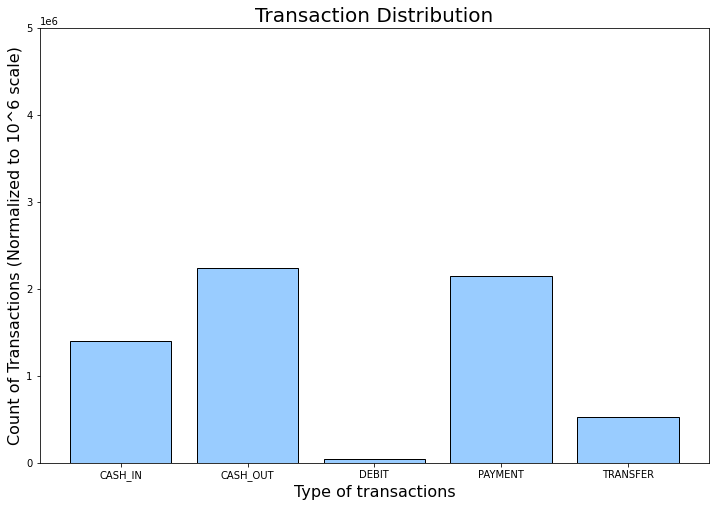

In [5]:
temp=df.groupby(['type']).count()['step'].reset_index()
temp
height=list(temp['step'])
height
bars=('CASH_IN','CASH_OUT','DEBIT','PAYMENT','TRANSFER')
y_pos = np.arange(len(bars))
plt.figure(figsize=(12, 8))
plt.bar(y_pos, height,color='#99ccff',edgecolor='black')
plt.xticks(y_pos, bars)
plt.xlabel('Type of transactions',fontsize=16)
plt.ylabel('Count of Transactions (Normalized to 10^6 scale)',fontsize=16)
plt.title('Transaction Distribution',fontsize=20)
plt.ylim((0, 5000000))
plt.show()


<b>Proof that fraudulent transactions exist only in transfer and cashout transactions

In [6]:
temp_f=df[df['isFraud']==1].groupby('type').count()['step']
temp_f

type
CASH_OUT    4116
TRANSFER    4097
Name: step, dtype: int64

<b>At this stage we reduce the transactions to focus on cashout and transfer, also the data is further reduced removing illegal transactions(assumption) where opening balance of the sender is less than amount involved in the transaction.

<b>2. Amount v/s opening balance of the recipient(oldbalanceDest)

We test our assumption that the recipeints account involved in fraudulent activities would carry less to no balance, predominantly because it is fraud account.<br>
Our assumption stands true and we clearly see a pattern in fraudulent transactions where opening balance of the recipient is less to 0, constantly across amounts of transfer/checkout.

Text(0.5, 1.0, 'Amount v/s opening balance of the recipient')

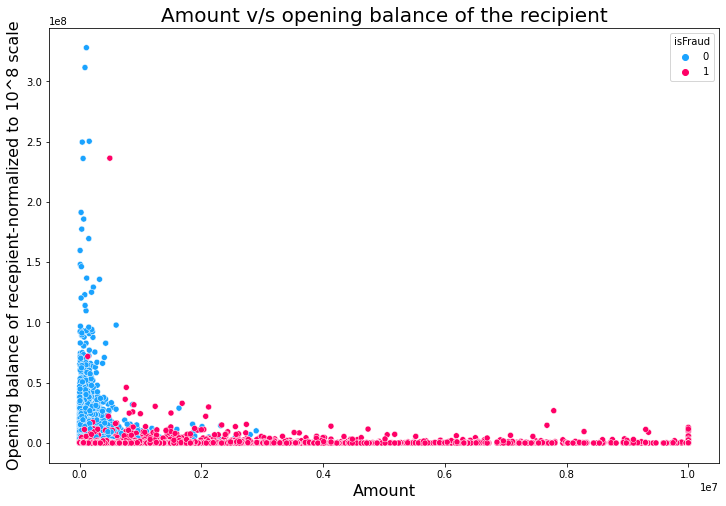

In [7]:
main_df=df[(df["type"]=="CASH_OUT")|(df["type"]=="TRANSFER")]
clean_df=main_df[main_df["amount"]<=main_df["oldbalanceOrg"]]
clean_df.head()
plt.figure(figsize=(12, 8))
pal=["#1aa3ff","#ff0066"]
sns.scatterplot(x="amount",y="oldbalanceDest",data=clean_df,palette=pal,hue="isFraud")
plt.ylabel('Opening balance of recepient-normalized to 10^8 scale',fontsize=16)
plt.xlabel('Amount',fontsize=16)
plt.title('Amount v/s opening balance of the recipient',fontsize=20)

<b>3. Histogram of step(measure of time in the dataset) for fraudulent transactions 

There seems to be a constant pattern in terms of fraudulent activities that occur daily, contrary to popular belief that these activities could be a result of security lapse, we see a pattern where fraudsters have been consistently cheating the system

In [8]:
clean_df[clean_df['isFraud']==1]['step'].max()

743

<AxesSubplot:title={'center':'Histogram of step for fraudulent transactions'}, xlabel='steps - unit of time', ylabel='Count of Fraudulent activities'>

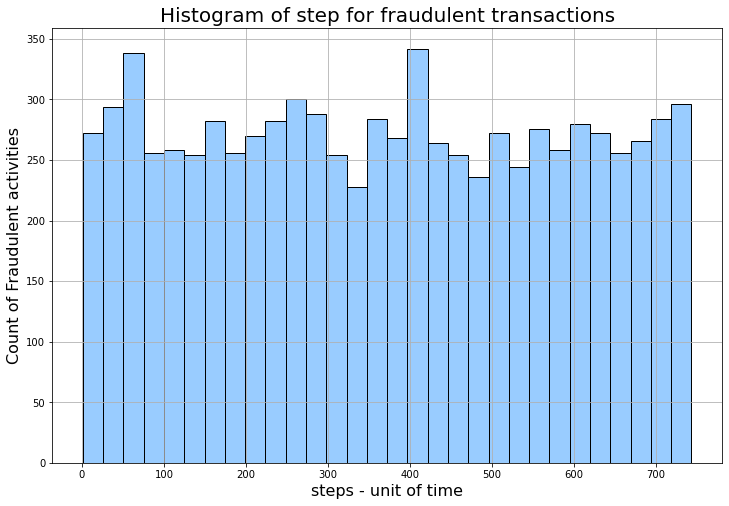

In [9]:
plt.figure(figsize=(12, 8))
plt.ylabel('Count of Fraudulent activities',fontsize=16)
plt.xlabel('steps - unit of time',fontsize=16)
plt.title('Histogram of step for fraudulent transactions',fontsize=20)
clean_df[clean_df['isFraud']==1]['step'].hist(bins=30,color='#99ccff',edgecolor='black')

<b>4. Histogram of transfer/checkout amount of fraudulent activities

We observe a huge saturation of fraudulent transactions for transfers/checkouts of lower amounts. The main reason for this could be to carry out these activities without being noticed

<AxesSubplot:title={'center':'Histogram of amount for fraudulent transactions'}, xlabel='Amount', ylabel='Count of Fraudulent activities'>

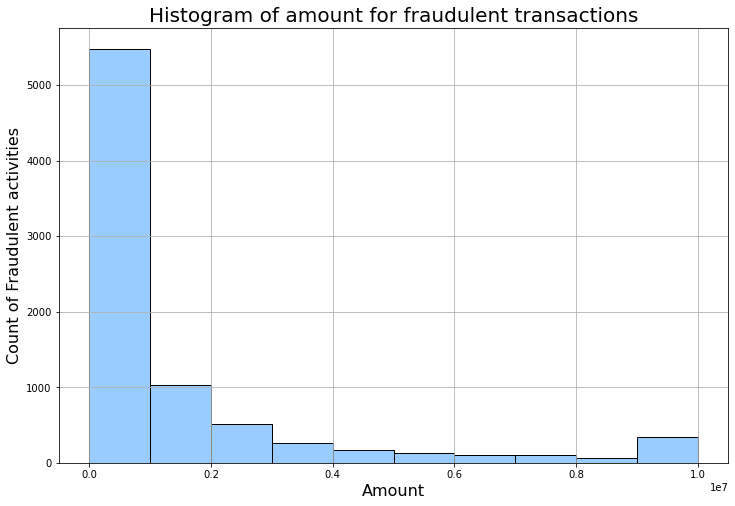

In [10]:
plt.figure(figsize=(12, 8))
plt.ylabel('Count of Fraudulent activities',fontsize=16)
plt.xlabel('Amount',fontsize=16)
plt.title('Histogram of amount for fraudulent transactions',fontsize=20)
clean_df[clean_df['isFraud']==1]['amount'].hist(color='#99ccff',edgecolor='black')

<b>5. Amount v/s opening balance of the customer/sender(oldbalanceDest)

There seems to be a trend between the opening balance of the customer, and the fraud amount, as the opening balance goes up the fraud amount is also going up

Text(0.5, 1.0, ' Amount v/s opening balance of the customer/sender')

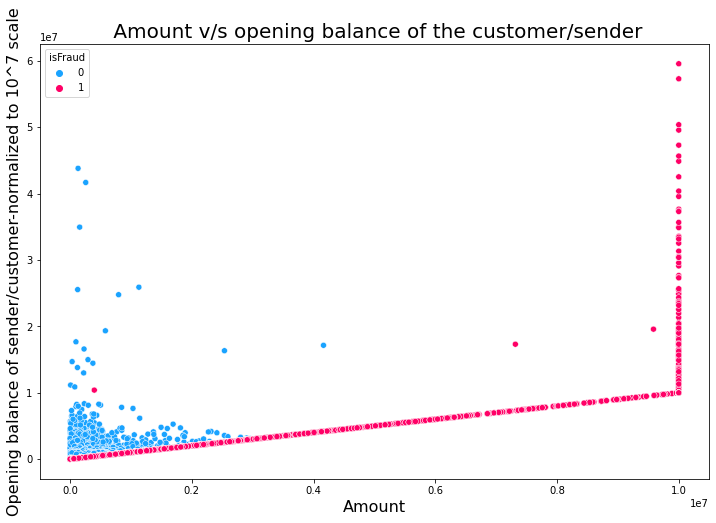

In [11]:
plt.figure(figsize=(12, 8))
pal=["#1aa3ff","#ff0066"]
sns.scatterplot(x="amount",y="oldbalanceOrg",data=clean_df,palette=pal,hue="isFraud")
plt.ylabel('Opening balance of sender/customer-normalized to 10^7 scale',fontsize=16)
plt.xlabel('Amount',fontsize=16)
plt.title(' Amount v/s opening balance of the customer/sender',fontsize=20)

# Modeling

Dropping the column <b>isFlaggedFraud</b> from the dataFrame because this column drastically differs from the <b>isFraud</b> column

In [12]:
clean_df=clean_df.drop('isFlaggedFraud',axis=1)

<b>Preparing the feature(independent variables) dataFrame and target(dependent variable) dataFrame

In [13]:
feature=clean_df.drop('isFraud',axis=1)

Dropping the columns <b>nameOrig</b>, and <b>nameDest</b> as they are all customer based transactions, based on filtering we have done above, we are left with only customer based transactions and none of the merchant based transactions.

In [14]:
feature=feature.drop('nameOrig',axis=1)
feature=feature.drop('nameDest',axis=1)
target=clean_df['isFraud']
feature = feature.join(pd.get_dummies(feature[['type']], prefix='type')).drop(['type'], axis=1)

In [15]:
feature.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_OUT,type_TRANSFER
2,1,181.00,181.00,0.00,0.0,0.00,0,1
3,1,181.00,181.00,0.00,21182.0,0.00,1,0
58,1,62610.80,79114.00,16503.20,517.0,8383.29,0,1
70,1,47458.86,209534.84,162075.98,52120.0,0.00,1,0
71,1,136872.92,162075.98,25203.05,217806.0,0.00,1,0


In [16]:
target.head()

2     1
3     1
58    0
70    0
71    0
Name: isFraud, dtype: int64

<b>Making a train test split

In [17]:

feature_train,feature_test, target_train, target_test=train_test_split(feature, target, test_size = 0.2,random_state=37, shuffle=False)

<b>Defining a function for model evaluation

In [18]:
def model_result(model,feature_test,target_test):
    target_prob=model.predict_proba(feature_test)
    target_pred=model.predict(feature_test)
    print('Confusion_matrix : ')
    metrics.plot_confusion_matrix(model,feature_test,target_test)
    print("accuracy_score")
    print(accuracy_score(target_test,target_pred))
    print("classification_report")
    print(classification_report(target_test,target_pred))


<b>Logistic Regression - Base Line model

Confusion_matrix : 
accuracy_score
0.944512465619732
classification_report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     52111
           1       1.00      0.26      0.42      4244

    accuracy                           0.94     56355
   macro avg       0.97      0.63      0.69     56355
weighted avg       0.95      0.94      0.93     56355



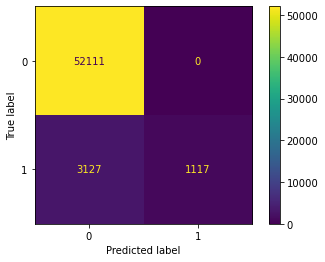

In [19]:
model1=LogisticRegression(solver='lbfgs',random_state=37)
model1=model1.fit(feature_train,target_train)
model_result(model1,feature_test,target_test)


Based on the confusion matrix, we can see that the sensitivity of our model in predicting the class of interest(fraudulent transaction) is not very high, value=0.26.
Therefore, even with a high accuracy score of 94%, this may not be the best model for our scenario.

<b>Random Forest Classifier

Confusion_matrix : 
accuracy_score
0.9999645106911543
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     52111
           1       1.00      1.00      1.00      4244

    accuracy                           1.00     56355
   macro avg       1.00      1.00      1.00     56355
weighted avg       1.00      1.00      1.00     56355



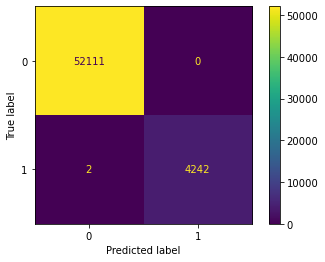

In [20]:
model2=RandomForestClassifier()
model2=model2.fit(feature_train,target_train)
model_result(model2,feature_test,target_test)

Based on the confusion matrix, we can see that sensitivity of predicting the class of interest is almost 100%, also the accuracy of the model is 99.97%, the only downside is tree based models like Random Forest loses it's interpretability as compared to a statistical model like Logistic Regression. Therefore, strictly due to its predictive capabilities and high sensitivity towards our class of interest(fradulent transactions), we would use with the random forest model.

# Assumptions

For transactions which are cashout and transfer, we have assumed that the bank doesnot provide any credit, i.e. if the amount of transaction is greater than the opening balance of the customer/sender, it is an invalid transaction and would not go through, hence they are filtered out from our analysis

# Approach

<b>1. </b>We started with exploratory data analysis, considering class of interest as fraudulent transactions.<br>
<b>2. </b>We have put a higher penalty on misclassifying the fraudulent transactions, as opposed to misclassifying legitimate transactions. The primary reason behind this is the real world cost associated with it, where one could lead to major loss in terms of revenue and reputation, whereas the other would be a case of mere inconvenience<br>
<b>3. </b>While building the model, we have considred just the transfer and cashout transaction types, as the other transaction types donot contain fraudulent transactions, considering them would have further under-represented the fraudulent cases.<br>
<b>4. </b>Two models have been built, logistic regression and RandomForestClassifier, based on the results, the RandomForest classifier has been chosen 

# Scope for improvement

<b>1.</b> We would try additional models like decision trees, Support Vector Classifier. <br>
<b>2. </b>We would try to fine tune the logistic regression model by over sampling the class of interest, hence preserving both the predictive capabilities and the interpretability.<br> 
<b>3. </b>Further we would try to pin point important features by exploring the odds ratio through Logistic Regression coefficients.<br>
<b>4. </b>Also we would have involved techniques like hyperparameter tuning and cross validation